In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données

In [9]:
df = pd.read_csv("./data_raw/blobs_simple.csv")
df = df[["Feature1", "Feature2"]]
df.head()

,Feature1,Feature2
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  300 non-null    float64
 1   Feature2  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [11]:
df.shape

(300, 2)

In [12]:
df.duplicated().sum()

np.int64(0)

# Analyse unidimensionnelle

In [13]:
df.describe()

,Feature1,Feature2
count,300.000000,300.000000
mean,-3.403837,2.845329
std,5.289154,6.225742
min,-11.309972,-8.919342
25%,-7.952236,-1.181119
50%,-4.708134,5.066995
75%,-0.117606,8.079443
max,6.954537,11.477528


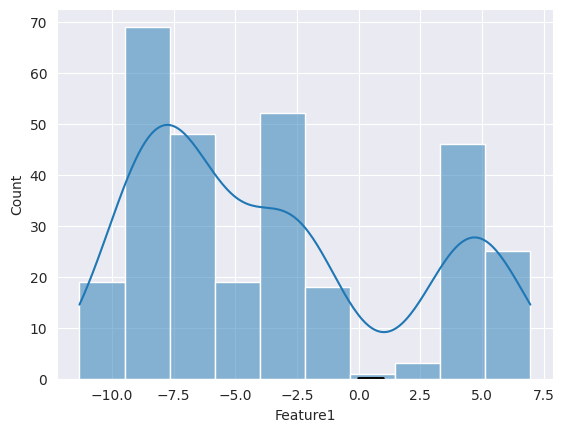

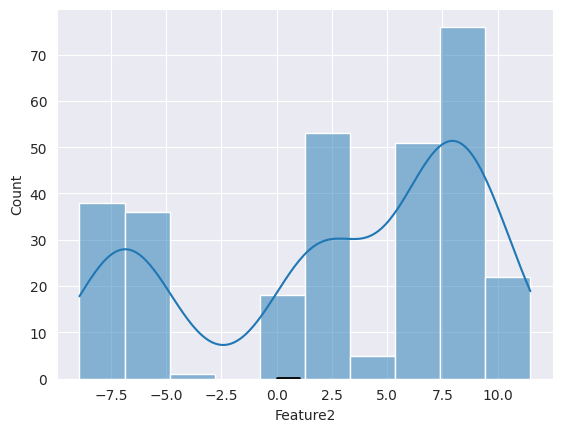

In [21]:
from scipy.stats import norm

for column in df.columns :
    mu, std = norm.fit(df[column])
    xmin, xmax = plt.xlim()

    x = np.linspace(xmin, xmax, df[column].count())
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, "k", linewidth=2)
    sns.histplot(df[column], kde=True)
    plt.show()

Nos données ne semblent pas suivre la loi normale

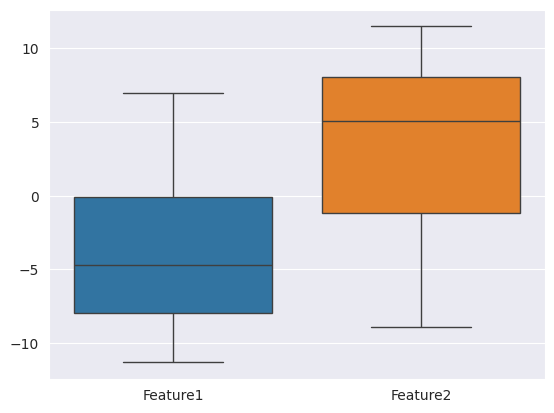

In [22]:
sns.boxplot(df)
plt.show()

Pas d'Outliers, Les données sont bien réparties autour de la médiane.
- Feature1 : Les données sont plus concentrés vers les valeurs négatives en l'occurence -5
- Feature2 : Ici, c'est le contraire, les données sont plus concentrés vers les valeurs positives en l'occurence 5

## Test de normalité

- Hypothèse nulle H0 : Les données suivent une distribution normale
- Hypothèse Alternative H1 : Les données ne suivent pas une distribution normale

In [23]:
from scipy.stats import shapiro
# Test de shapiro wilk
stat, p_value = shapiro(df["Feature1"])
print(f"Feature1 \nStatistic : {stat} \t p value : {p_value}")

stat, p_value = shapiro(df["Feature2"])
print(f"Feature2 \nStatistic : {stat} \t p value : {p_value}")

Feature1 
Statistic : 0.8874470692522346 	 p value : 4.394089554609733e-14
Feature2 
Statistic : 0.8603661328543405 	 p value : 8.326019409464217e-16


Les données de nos deux variables ne suivent donc pas une loi normale. Pour la suite des tests nous devrons donc utiliser des tests non-paramétriques

# Analyse Bidimensionnelle

In [25]:
# Matrice de corrélation

print("Matrice de corrélation")
np.corrcoef(df.Feature1, df.Feature2)

Matrice de corrélation


array([[1.       , 0.0579265],
       [0.0579265, 1.       ]])

<Axes: xlabel='Feature1', ylabel='Feature2'>

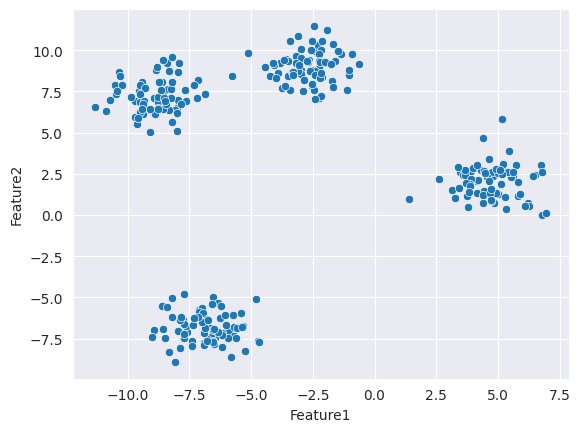

In [26]:
# Nuage de points
sns.scatterplot(df, x="Feature1", y="Feature2")

La matice de corrélation et notre nuage de point nous montre clairement l'inexistence d'un lien linéaire. Procédons par un test statistique pour confirmer ces faits

In [27]:
from scipy.stats import spearmanr
# Test de Spearman
stat, p_value = spearmanr(df.Feature1, df.Feature2)
print(f"Statistic : {stat} \t p value : {p_value}")

Statistic : -0.005776508627873643 	 p value : 0.9206339390847103


Il n'existe bel et bien aucun lien entre nos deux variables.

# Mise en place du K-means

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [35]:
# Séparation des données
index = df.index
features = df.columns
X = df.values

In [36]:
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.11618972,  0.58377179],
       [-1.19214185,  0.65863295],
       [ 0.32520384,  0.79611099],
       [-0.6994772 , -1.38795911],
       [-1.4151792 ,  0.55831196]])

In [37]:
# Méthode du coude

inertia = []

k_list = range(1, 11)
k_list

range(1, 11)

In [38]:
for i in k_list :
    k_means = KMeans(n_clusters=i)
    k_means.fit(X_scaled)
    inertia.append(k_means.inertia_)

inertia

[599.9999999999998,
 361.7322789575035,
 71.6883189427333,
 17.466197609060576,
 15.682730334559613,
 14.50396910789918,
 12.985345205469565,
 10.847643665889837,
 10.924936680160162,
 9.148542422677359]

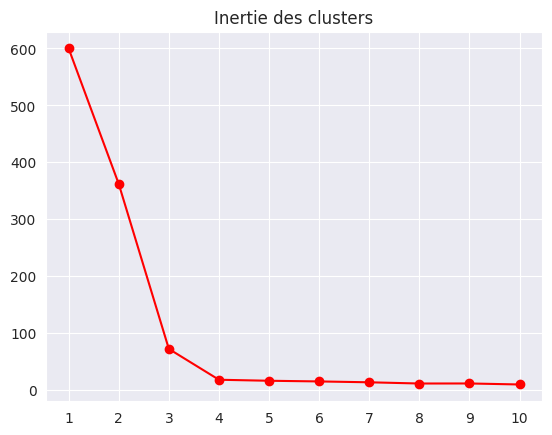

In [40]:
# Visualisation
plt.title("Inertie des clusters")
plt.xticks(k_list)
plt.plot(k_list, inertia, marker="o", c="red")
plt.show()

On prendra 4 clusters

In [41]:
n_clusters = 4

In [42]:
k_means = KMeans(n_clusters=n_clusters)
k_means.fit(X_scaled)
labels = k_means.labels_

In [43]:
df["clusters"] = labels

In [45]:
df.head()

,Feature1,Feature2,clusters
0,-9.297689,6.473679,0
1,-9.698741,6.938967,0
2,-1.686653,7.793442,3
3,-7.097308,-5.781333,1
4,-10.876452,6.315437,0


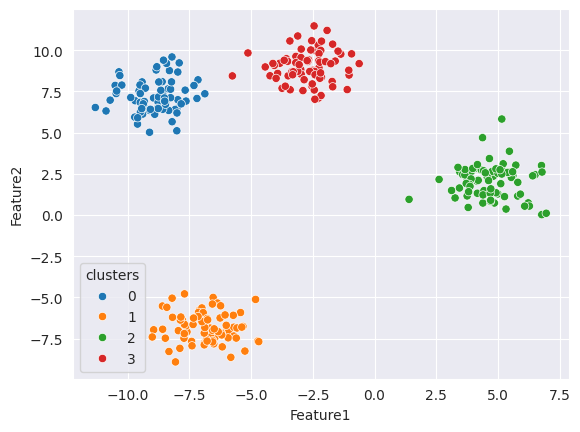

In [47]:
sns.scatterplot(df, x="Feature1", y="Feature2", hue="clusters", palette=sns.color_palette("tab10")[:4])
plt.show()

# Classification Hiérarchique

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.11618972,  0.58377179],
       [-1.19214185,  0.65863295],
       [ 0.32520384,  0.79611099],
       [-0.6994772 , -1.38795911],
       [-1.4151792 ,  0.55831196]])

In [53]:
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(X_scaled, method="ward", metric="euclidean")

In [60]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z, labels=None,
                    figsize=(30, 15),
                    title="Hierarchical Clustering Dendrogram",
                    x_label="Distances", y_label="Clusters",
                    orientation="top" ) :
    """
    Affiche un dendrogramme horizontal à partir d'une matrice de linkage déjà calculée

    Paramètres :
    ------------
    Z : array-like
        Matrice de linkage obtenue via scipy.cluster.hierarchy.linkage.
    labels : list ou None
        Noms à afficher sur les feuilles du dendrogramme.
    figsize : tuple
        Taille de la figure (largeur, hauteur).
    title : str
        Titre du graphique
    orientation : str
        Orientation du dendogramme.
    """

    fig, ax = plt.subplots(1, 1, figsize=figsize)

    dendrogram(
        Z,
        ax=ax,
        labels=labels,
        orientation=orientation,
        leaf_font_size=15
    )

    plt.title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.tight_layout()
    plt.show()

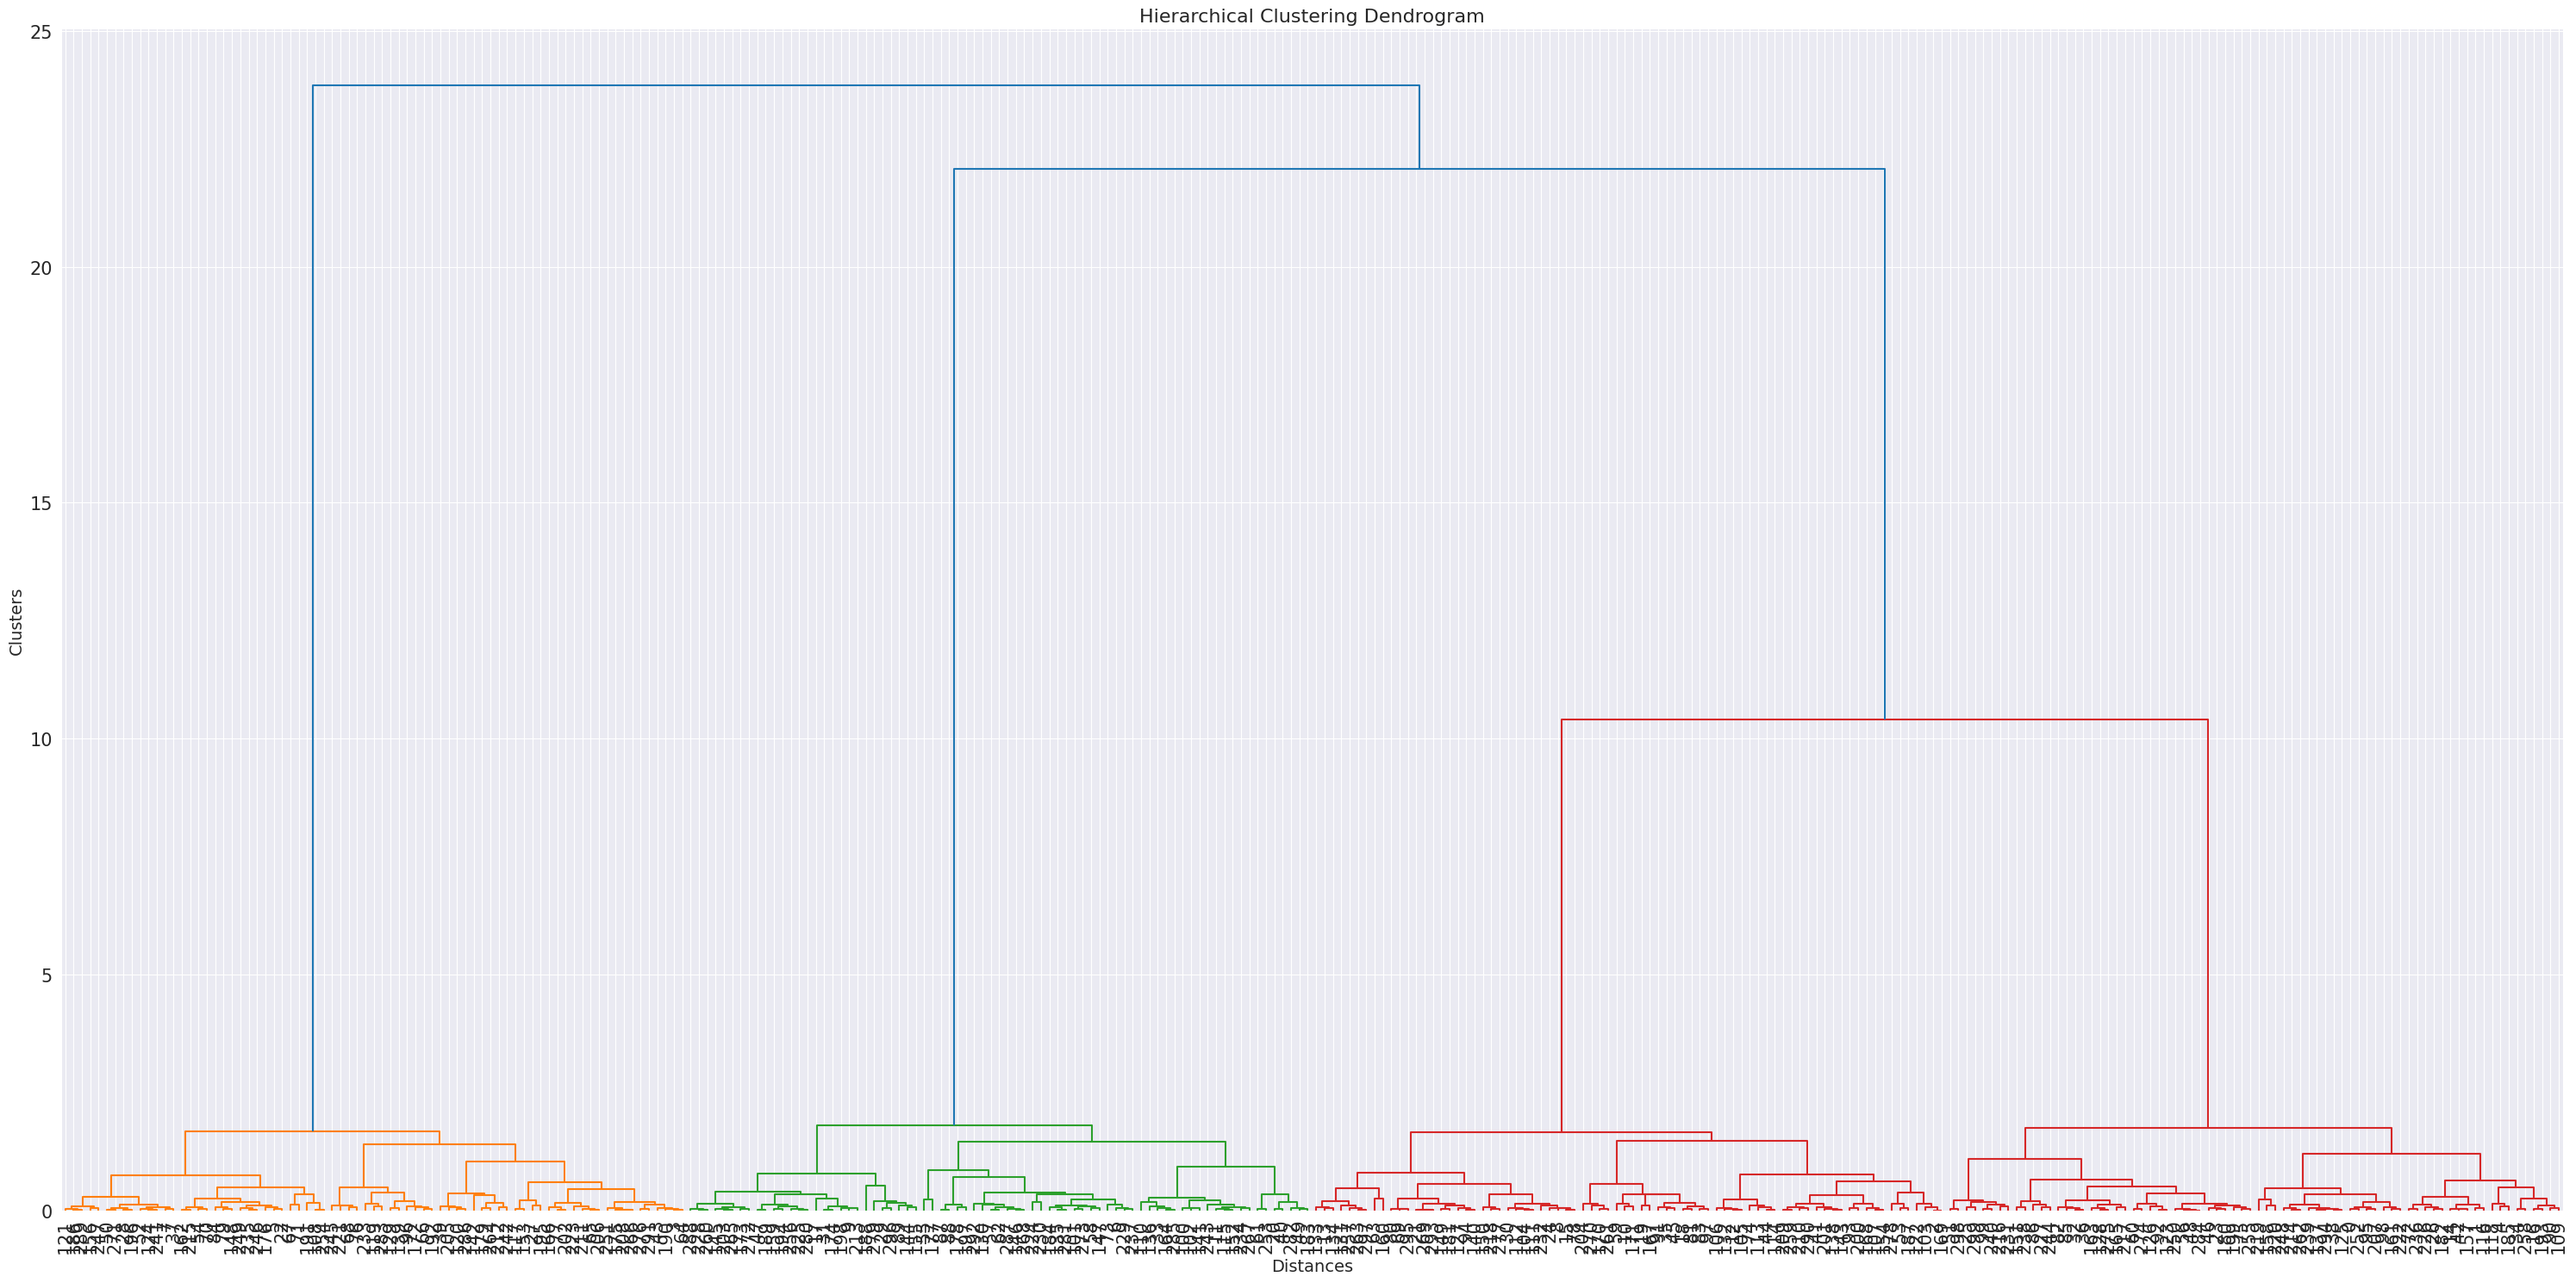

In [61]:
# Construction du dendogramme
plot_dendrogram(Z, labels=index)

In [62]:
from sklearn.metrics import silhouette_score

max_clusters = 10
silhouette_scores = []

for i in range(2, max_clusters+1) :
    Z = linkage(X_scaled, method="ward", metric="euclidean")
    clusters = fcluster(Z, t=i, criterion="maxclust")
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

silhouette_scores

[0.55773379731114,
 0.743594601645247,
 0.797473988963273,
 0.6672213553741213,
 0.5540719695226066,
 0.41660569634224665,
 0.30934964372621904,
 0.32567245329423655,
 0.340212999837435]

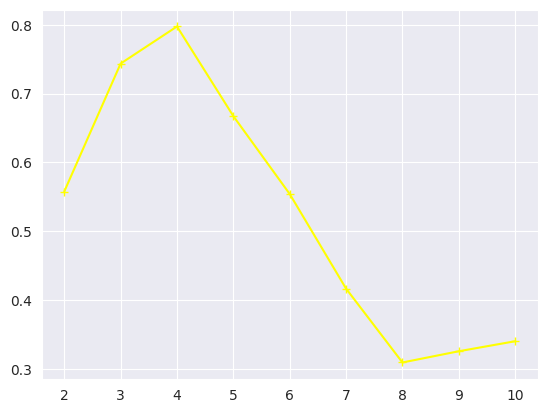

In [65]:
plt.plot(range(2, max_clusters+1), silhouette_scores, marker="+", c="yellow")
plt.show()

On prendra donc 4 clusters

In [66]:
n_clusters = 4

clusters = fcluster(Z, t=n_clusters, criterion="maxclust")
df["clusters"] = clusters

<Axes: xlabel='Feature1', ylabel='Feature2'>

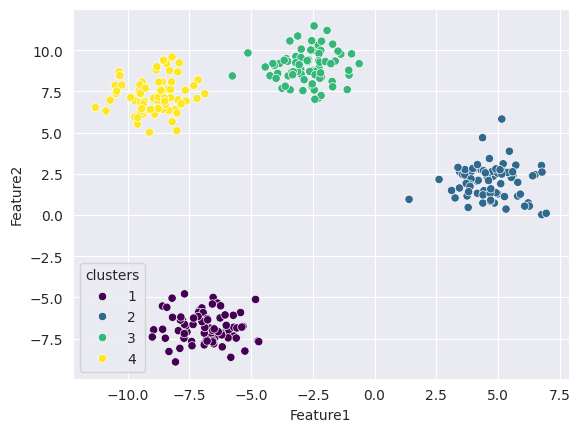

In [68]:
# Visualisation
sns.scatterplot(df, x="Feature1", y="Feature2", hue="clusters", palette=sns.color_palette("viridis", as_cmap=True))

En conclusion, la classification hiérarchique et l'algorithme du K-means ont tous deux permis d'aboutir aux mêmes groupes d'individus, mais le choix du nombre de clusters a été plus évident lors de la Classification Hiérarchique.